In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Temp_Data.csv', index_col = 'DATE', parse_dates = True)

In [6]:
df.index.freq = 'D'
df.dropna(inplace = True)

In [7]:
df.head()

,Temp,relative_humidity,wind_speed,Pressure
DATE,,,,
2020-01-01,-0.44,86.0,18.5,100.15
2020-01-02,-0.09,79.0,14.0,100.47
2020-01-03,2.95,82.0,12.0,100.64
2020-01-04,-0.80,86.0,15.0,100.75
2020-01-05,-7.95,74.5,15.0,101.06


In [9]:
#here we want to forecast temperature features
df = pd.DataFrame(df['Temp'])

In [10]:
df.head()

,Temp
DATE,
2020-01-01,-0.44
2020-01-02,-0.09
2020-01-03,2.95
2020-01-04,-0.80
2020-01-05,-7.95


<AxesSubplot:xlabel='DATE'>

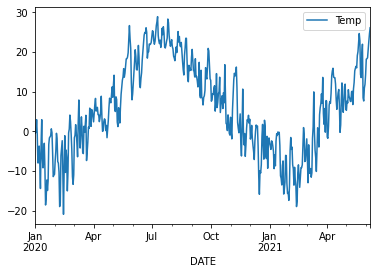

In [11]:
df.plot()

In [12]:
train = df.iloc[:510,0]
test = df.iloc[510:0]

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

<AxesSubplot:xlabel='DATE', ylabel='Resid'>

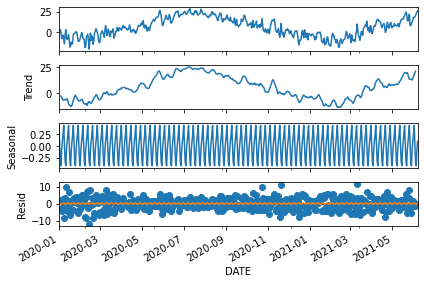

In [20]:
Decomp_results = seasonal_decompose(df)
Decomp_results.plot()
Decomp_results.seasonal.plot()

<AxesSubplot:xlabel='DATE'>

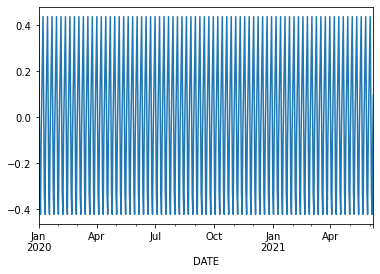

In [19]:
Decomp_results.seasonal.plot()

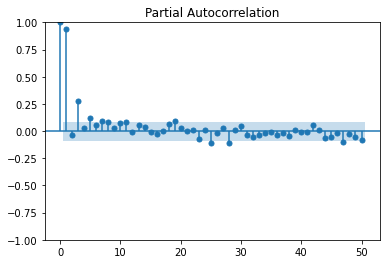

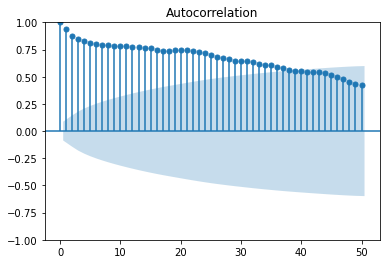

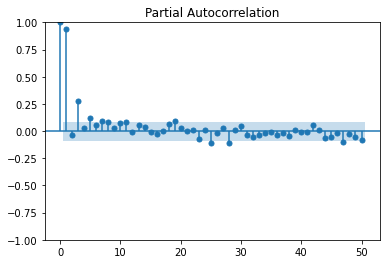

In [22]:
# Finding the Parameters (p,d,q)
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(train, lags = 50 )
plot_pacf(train, lags = 50 )

In [24]:
#start with grid search now
from pmdarima import auto_arima


In [25]:
auto_arima(df,trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2846.718, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2929.050, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2931.026, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2930.983, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2927.135, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2845.685, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2856.303, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2882.045, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2846.604, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2848.805, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2858.051, Time=0.08 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2848.587, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2844.520, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2854.723, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]          

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [26]:
##developing arima model

In [30]:
#from statsmodels.tsa.arima_model import ARIMA
#A_Model = ARIMA(train, order = (1,1,2))

#predictor = A_Model.fit()

#predictor.summary()

from statsmodels.tsa.arima.model import ARIMA

# Replace 'train' with your actual training data
A_Model = ARIMA(train, order=(1, 1, 2))  # Example order (p, d, q) = (1, 1, 2)

# Fit the model
predictor = A_Model.fit()

# Print summary of the model
print(predictor.summary())

                               SARIMAX Results                                
Dep. Variable:                   Temp   No. Observations:                  510
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1378.671
Date:                Sat, 22 Jun 2024   AIC                           2765.341
Time:                        19:04:56   BIC                           2782.271
Sample:                    01-01-2020   HQIC                          2771.979
                         - 05-24-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3234      0.077      4.216      0.000       0.173       0.474
ma.L1         -0.3850      0.074     -5.223      0.000      -0.529      -0.240
ma.L2         -0.4007      0.046     -8.772      0.0

In [35]:
#prediction and model evaluation needed
#Predicted_results = predictor.predict(start = len(train), end = len((train)+len(test))-1, typ = 'levels')
start = len(train)  # Start predicting from the end of the training data
end = len(train) + len(test) - 1  # End prediction at the end of the test data

# Make predictions
predicted_results = predictor.predict(start=start, end=end, typ='levels')


ValueError: Prediction must have `end` after `start`.

In [37]:
Predicted_results = predictor.predict(start = len(train), end = len(train)+len(test) - 1, typ = 'levels')

ValueError: Prediction must have `end` after `start`.

In [39]:
Predicted_results = predictor.predict(start = len(train), end = len(train)+len(test) - 1, typ = 'levels')


/home/mayank/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


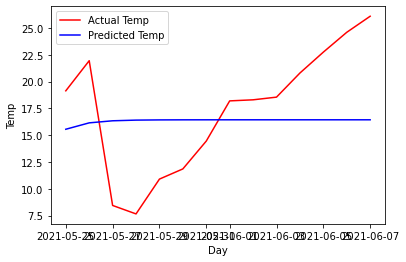

In [40]:
plt.plot(test, color = 'red', label = 'Actual Temp')
plt.plot(Predicted_results, color = 'blue', label = 'Predicted Temp')
plt.xlabel ('Day')
plt.ylabel('Temp')
plt.legend()
plt.show()

In [42]:
Predicted_results.mean()

16.341511614611996